<a href="https://colab.research.google.com/github/Josh1313/-sales-propensity-models-/blob/main/1_5_KmeanTFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leer el archivo pickle
df = pd.read_pickle("/content/drive/MyDrive/TFM/pkl.data_TFM/PREPROCESAMIENTO_KMEANS.pkl")

In [ ]:
df.shape

(456369, 41)

In [ ]:
df.head(5)

,Unique_ID_client,duracion_meses,product10,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,tiempo_entre_compras_mismo_producto,tiempo_desde_ultima_compra_otro_partition,tiempo_entre_compras_mismo_producto_partition,entry_year,entry_month,entry_day,pk_partition_year,pk_partition_month,pk_partition_day,zona
entry_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,622277,53,False,KAT,1.0,02 - PARTICULARES,0,0,0,0,...,0,0,0,2015,1,1,2019,5,28,Europe
2015-01-02,1000394,53,True,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,2015,1,2,2019,5,28,Europe
2015-01-02,1000554,53,False,KFC,0.0,02 - PARTICULARES,0,0,0,0,...,0,0,0,2015,1,2,2019,5,28,Europe
2015-01-02,1000552,53,True,KFC,1.0,02 - PARTICULARES,0,0,0,0,...,0,0,0,2015,1,2,2019,5,28,Europe
2015-01-02,1000551,53,True,KFC,1.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,2015,1,2,2019,5,28,Europe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 456369 entries, 2015-01-01 00:00:00 to 2019-05-31 00:00:00
Data columns (total 41 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Unique_ID_client                               456369 non-null  int64  
 1   duracion_meses                                 456369 non-null  int64  
 2   product10                                      456369 non-null  bool   
 3   entry_channel                                  456369 non-null  object 
 4   active_customer                                456369 non-null  float64
 5   segment                                        456369 non-null  object 
 6   short_term_deposit                             456369 non-null  int64  
 7   loans                                          456369 non-null  int64  
 8   mortgage                                       456369 non-null  int64  
 9   fun

In [ ]:
df1 = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna 'country_id'
df1['country_id_numeric'] = label_encoder.fit_transform(df1['country_id'])


In [ ]:
df1.head()

,Unique_ID_client,duracion_meses,product10,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,tiempo_desde_ultima_compra_otro_partition,tiempo_entre_compras_mismo_producto_partition,entry_year,entry_month,entry_day,pk_partition_year,pk_partition_month,pk_partition_day,zona,country_id_numeric
entry_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,622277,53,False,KAT,1.0,02 - PARTICULARES,0,0,0,0,...,0,0,2015,1,1,2019,5,28,Europe,14
2015-01-02,1000394,53,True,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,2015,1,2,2019,5,28,Europe,14
2015-01-02,1000554,53,False,KFC,0.0,02 - PARTICULARES,0,0,0,0,...,0,0,2015,1,2,2019,5,28,Europe,14
2015-01-02,1000552,53,True,KFC,1.0,02 - PARTICULARES,0,0,0,0,...,0,0,2015,1,2,2019,5,28,Europe,14
2015-01-02,1000551,53,True,KFC,1.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,2015,1,2,2019,5,28,Europe,14


In [ ]:
del df1['country_id']

In [ ]:
df1.shape

(456369, 41)

In [ ]:
object_columns = df1.select_dtypes(include=['object']).columns

In [ ]:
object_columns

Index(['entry_channel', 'segment', 'gender', 'deceased', 'zona'], dtype='object')

In [ ]:
df_dummies = pd.get_dummies(df1, columns=object_columns, drop_first=True)

In [ ]:
df_dummies.shape

(456369, 60)

In [ ]:
print(df_dummies.columns)

Index(['Unique_ID_client', 'duracion_meses', 'product10', 'active_customer',
       'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'Cuenta easyMoney++', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'Cuenta easyMoney Crypto',
       'debit_card', 'Cuenta easyMoney+', 'Cuenta easyMoney', 'region_code',
       'age', 'salary', 'product40', 'product60', 'dias_entre_compras',
       'tiempo_desde_ultima_compra_otro',
       'tiempo_entre_compras_mismo_producto',
       'tiempo_desde_ultima_compra_otro_partition',
       'tiempo_entre_compras_mismo_producto_partition', 'entry_year',
       'entry_month', 'entry_day', 'pk_partition_year', 'pk_partition_month',
       'pk_partition_day', 'country_id_numeric', 'entry_channel_KAZ',
       'entry_channel_KFA', 'entry_channel_KFC', 'entry_channel_KHC',
       'entry_channel_KHD', 'entry_channel_KHE', 'entry_channel_KHF',
       'entry_channel_KHK', 'entry_channel_KHL', 'entry_ch

In [ ]:
columns_to_drop = [ # 'Unique_ID_client',
            # 'duracion_meses',
            'product10',
            # 'active_customer',
            # 'short_term_deposit',
           #  'loans',
           #  'mortgage',
           #  'funds',
           #  'securities',
           #  'long_term_deposit',
           #  'Cuenta easyMoney++',
           #  'credit_card',
           #  'payroll',
           #  'pension_plan',
           #  'payroll_account',
            # 'Cuenta easyMoney Crypto',
           #  'debit_card',
           #  'Cuenta easyMoney+',
          #   'Cuenta easyMoney',
             'region_code',
          #   'age',
          #   'salary',
             'product40',
             'product60',
           #  'dias_entre_compras',
          #   'tiempo_desde_ultima_compra_otro',
           #  'tiempo_entre_compras_mismo_producto',
           #  'tiempo_desde_ultima_compra_otro_partition',
           #  'tiempo_entre_compras_mismo_producto_partition',
           'entry_year',
           'entry_month',
           'entry_day',
           'pk_partition_year',
           'pk_partition_month',
           'pk_partition_day',
           'country_id_numeric',
           'entry_channel_KAZ',
           'entry_channel_KFA',
           'entry_channel_KFC',
           'entry_channel_KHC',
           'entry_channel_KHD',
           'entry_channel_KHE',
           'entry_channel_KHF',
           'entry_channel_KHK',
           'entry_channel_KHL',
           'entry_channel_KHM',
           'entry_channel_KHN',
           'entry_channel_KHO',
           'entry_channel_KHQ',
           'entry_channel_Otros',
           'entry_channel_RED',
          # 'segment_02 - PARTICULARES',
          # 'segment_03 - UNIVERSITARIO',
           #  'gender_Male',
          #   'deceased_S',
          #   'zona_Asia',
           #  'zona_Europe',
          #   'zona_Middle East',
           #  'zona_North America',
           #  'zona_South America'
            ]

In [ ]:
df_dummies = df_dummies.drop(columns=columns_to_drop)

In [ ]:
df_dummies.shape

(456369, 34)

In [ ]:
df2 = df_dummies.copy()

In [ ]:
#df2['product10'] = df2['product10'].astype(int)
#df2['product40'] = df2['product40'].astype(int)
#df2['product60'] = df2['product60'].astype(int)

In [ ]:
df2.head()

,Unique_ID_client,duracion_meses,active_customer,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,Cuenta easyMoney++,...,tiempo_entre_compras_mismo_producto_partition,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,gender_Male,deceased_S,zona_Asia,zona_Europe,zona_Middle East,zona_North America,zona_South America
entry_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,622277,53,1.0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-01-02,1000394,53,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2015-01-02,1000554,53,0.0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-01-02,1000552,53,1.0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-01-02,1000551,53,1.0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [ ]:
df2['zona_South America'].sum()

17

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 456369 entries, 2015-01-01 00:00:00 to 2019-05-31 00:00:00
Data columns (total 34 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Unique_ID_client                               456369 non-null  int64  
 1   duracion_meses                                 456369 non-null  int64  
 2   active_customer                                456369 non-null  float64
 3   short_term_deposit                             456369 non-null  int64  
 4   loans                                          456369 non-null  int64  
 5   mortgage                                       456369 non-null  int64  
 6   funds                                          456369 non-null  int64  
 7   securities                                     456369 non-null  int64  
 8   long_term_deposit                              456369 non-null  int64  
 9   Cue

In [ ]:
# Escalar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df2)

In [ ]:
# Método del codo para determinar el número óptimo de clusters
inertia_values = []
for k in range(1, 11):
    n_init_value = 10  # Cambia este valor según tus preferencias
    kmeans = KMeans(n_clusters=k, n_init=n_init_value, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

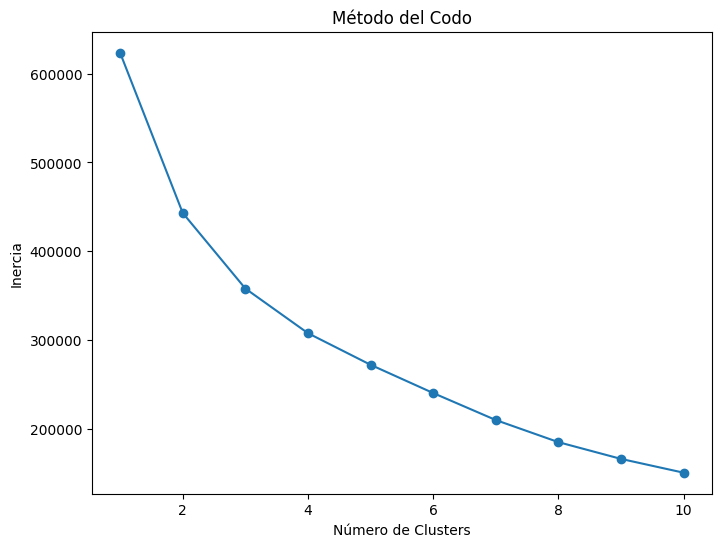

In [ ]:
# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

In [ ]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_predicted

array([1, 3, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
df2['cluster2'] = y_predicted
df2

,Unique_ID_client,duracion_meses,active_customer,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,Cuenta easyMoney++,...,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,gender_Male,deceased_S,zona_Asia,zona_Europe,zona_Middle East,zona_North America,zona_South America,cluster2
entry_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,622277,53,1.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2015-01-02,1000394,53,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,3
2015-01-02,1000554,53,0.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2015-01-02,1000552,53,1.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2015-01-02,1000551,53,1.0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-31,1553554,0,0.0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,2
2019-05-31,1553555,0,0.0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,2
2019-05-31,1553556,0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,2


In [ ]:
df2.head(10)

,Unique_ID_client,duracion_meses,active_customer,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,Cuenta easyMoney++,...,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,gender_Male,deceased_S,zona_Asia,zona_Europe,zona_Middle East,zona_North America,zona_South America,cluster2
entry_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,622277,53,1.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2015-01-02,1000394,53,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,3
2015-01-02,1000554,53,0.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2015-01-02,1000552,53,1.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2015-01-02,1000551,53,1.0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
2015-01-02,1000550,53,1.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2015-01-02,1000549,53,0.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2015-01-02,1000548,53,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,3
2015-01-02,1000547,53,0.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1


In [ ]:
df3 = df2[df2.cluster2==0]
df4 = df2[df2.cluster2==1]
df5 = df2[df2.cluster2==2]
df6 = df2[df2.cluster2==3]
#df7 = df2[df2.cluster2==4]

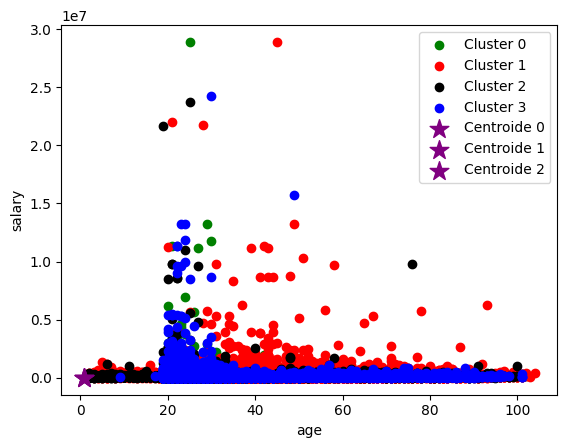

In [ ]:
import matplotlib.pyplot as plt

centroids = kmeans.cluster_centers_

# Visualizar los clusters usando diferentes colores
plt.scatter(df3['age'], df3['salary'], color='green', label='Cluster 0')
plt.scatter(df4['age'], df4['salary'], color='red', label='Cluster 1')
plt.scatter(df5['age'], df5['salary'], color='black', label='Cluster 2')
plt.scatter(df6['age'], df6['salary'], color='blue', label='Cluster 3')
#plt.scatter(df7['age'], df7['salary'], color='blue', label='Cluster 4')

# Etiquetas y leyenda
plt.xlabel('age')
plt.ylabel('salary')
plt.scatter(centroids[0, 0], centroids[0, 1], color='purple', marker='*', s=200, label='Centroide 0')
plt.scatter(centroids[1, 0], centroids[1, 1], color='purple', marker='*', s=200, label='Centroide 1')
plt.scatter(centroids[2, 0], centroids[2, 1], color='purple', marker='*', s=200, label='Centroide 2')
plt.legend()

# Mostrar el gráfico
plt.show()



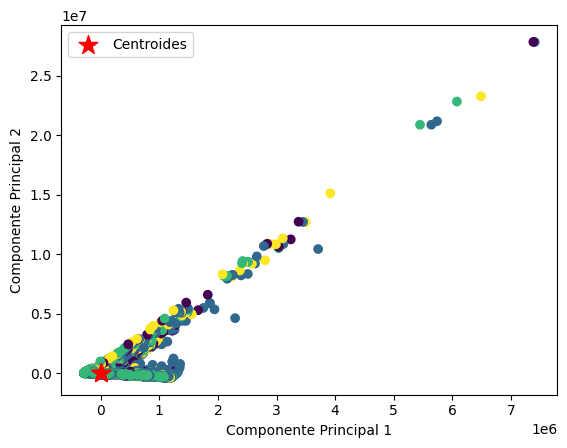

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(df2)

plt.scatter(components[:, 0], components[:, 1], c=km.labels_, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='red', marker='*', s=200, label='Centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Obtener los clústeres únicos en tus datos
unique_clusters = df2['cluster2'].unique()

# Crear un diccionario para almacenar los DataFrames por clúster
cluster_dataframes = {}

# Iterar a través de los clústeres únicos
for cluster_label in unique_clusters:
    cluster_data = df2[df2['cluster2'] == cluster_label].copy()  # Copiamos los datos para evitar cambios en el DataFrame original
    cluster_dataframes[cluster_label] = cluster_data

# Ahora, cluster_dataframes contiene los DataFrames separados por clúster
# Puedes acceder a cada DataFrame usando cluster_dataframes[cluster_label]
# Por ejemplo, cluster_0_data = cluster_dataframes[0], cluster_1_data = cluster_dataframes[1], etc.


## Cluster 1

In [ ]:
cluster_0_data = cluster_dataframes[0]

In [ ]:
cluster_0_data.shape

(110803, 35)

In [ ]:
cluster_0_data.head(5)

,Unique_ID_client,duracion_meses,active_customer,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,Cuenta easyMoney++,...,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,gender_Male,deceased_S,zona_Asia,zona_Europe,zona_Middle East,zona_North America,zona_South America,cluster2
entry_date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1000551,53,1.0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
2015-01-02,1000541,53,1.0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
2015-01-02,1000528,53,1.0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
2015-01-02,1000579,53,0.0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
2015-01-02,1000573,53,1.0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


In [ ]:
print(cluster_0_data.columns)

Index(['Unique_ID_client', 'duracion_meses', 'active_customer',
       'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'Cuenta easyMoney++', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'Cuenta easyMoney Crypto',
       'debit_card', 'Cuenta easyMoney+', 'Cuenta easyMoney', 'age', 'salary',
       'dias_entre_compras', 'tiempo_desde_ultima_compra_otro',
       'tiempo_entre_compras_mismo_producto',
       'tiempo_desde_ultima_compra_otro_partition',
       'tiempo_entre_compras_mismo_producto_partition',
       'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO',
       'gender_Male', 'deceased_S', 'zona_Asia', 'zona_Europe',
       'zona_Middle East', 'zona_North America', 'zona_South America',
       'cluster2'],
      dtype='object')


Active_clients

In [ ]:
# Cuántos activos hay en el cluster
num_active_customers = (cluster_0_data['active_customer'] == 1).sum()
print(f"Número de clientes activos en el cluster: {num_active_customers}")
#  Cuántos no activos hay en el cluster
num_active_customers = (cluster_0_data['active_customer'] == 0).sum()
print(f"Número de clientes no activos en el cluster: {num_active_customers}")

Número de clientes activos en el cluster: 43950
Número de clientes no activos en el cluster: 66853


Productos Financieros

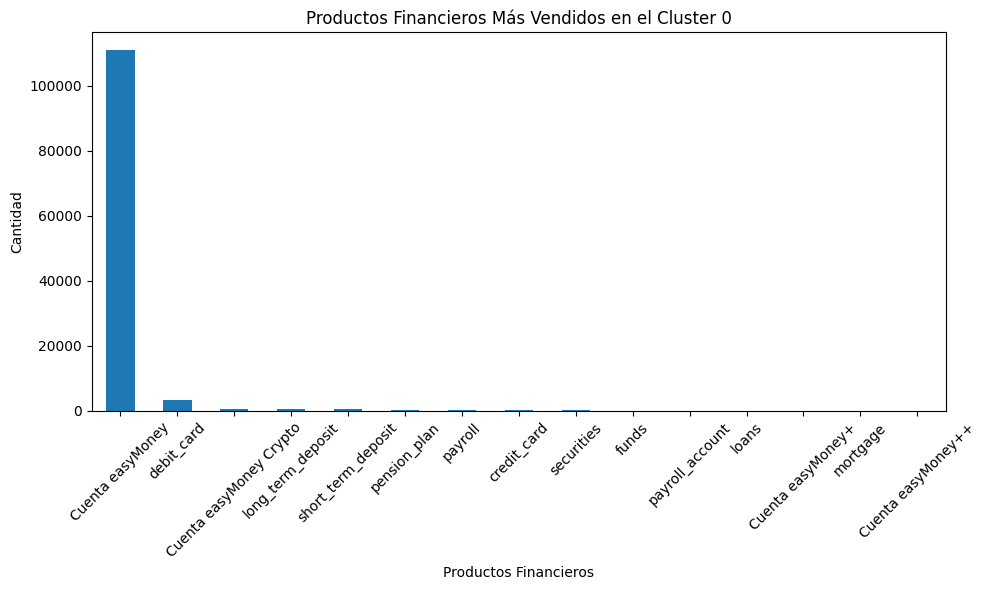

In [ ]:
#  Productos financieros más vendidos
product_columns1 = ['Cuenta easyMoney', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'Cuenta easyMoney++', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'Cuenta easyMoney Crypto', 'debit_card', 'Cuenta easyMoney+',]
product_sales = cluster_0_data[product_columns1].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.title("Productos Financieros Más Vendidos en el Cluster 0")
plt.xlabel("Productos Financieros")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

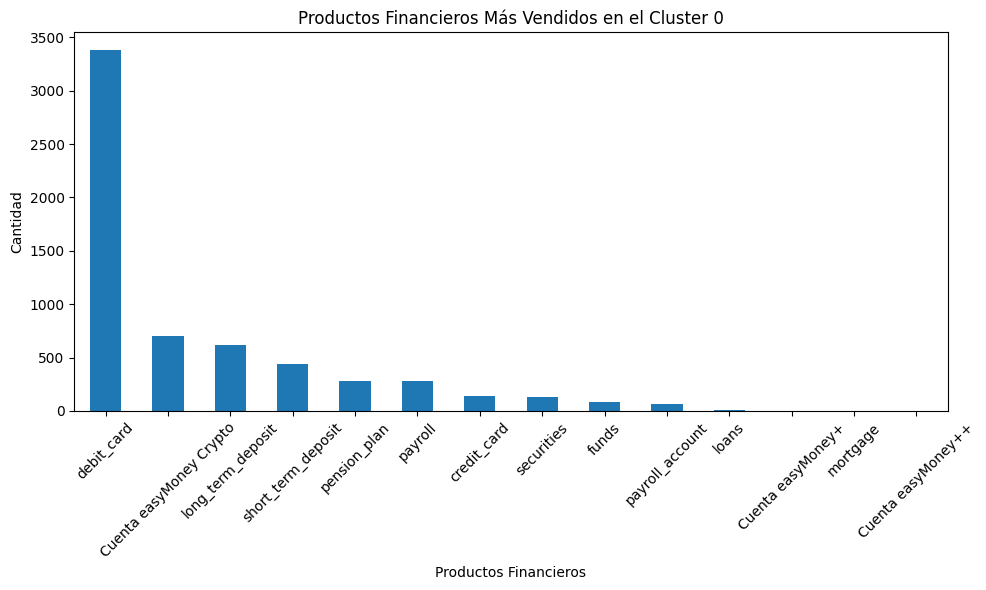

In [ ]:
#  Productos financieros más vendidos ( el mas vendido es la cuenta easy money la quite para poder visualizar las demas)
product_columns = ['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'Cuenta easyMoney++', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'Cuenta easyMoney Crypto', 'debit_card', 'Cuenta easyMoney+',]
product_sales = cluster_0_data[product_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.title("Productos Financieros Más Vendidos en el Cluster 0")
plt.xlabel("Productos Financieros")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from itertools import combinations

# Generar todas las combinaciones posibles de productos (excluyendo la Cuenta easyMoney++)
product_combinations = list(combinations(product_columns1[:-1], 2))

# Contar la frecuencia de cada combinación en el Cluster 0
combination_counts = {}
for combo in product_combinations:
    combo_name = f"{combo[0]} + {combo[1]}"
    combination_counts[combo_name] = cluster_0_data[list(combo)].all(axis=1).sum()

# Crear un DataFrame para mostrar los resultados de manera tabular
result_df = pd.DataFrame(list(combination_counts.items()), columns=['Combinación de Productos', 'Frecuencia'])
result_df = result_df[result_df['Frecuencia'] > 0]  # Filtrar combinaciones con frecuencia mayor que cero
result_df = result_df.sort_values(by='Frecuencia', ascending=False)

# Mostrar la tabla de resultados
print(result_df)


                        Combinación de Productos  Frecuencia
12                 Cuenta easyMoney + debit_card        3379
11    Cuenta easyMoney + Cuenta easyMoney Crypto         703
5           Cuenta easyMoney + long_term_deposit         618
0          Cuenta easyMoney + short_term_deposit         437
9                Cuenta easyMoney + pension_plan         280
81                        payroll + pension_plan         276
8                     Cuenta easyMoney + payroll         276
90          Cuenta easyMoney Crypto + debit_card         200
7                 Cuenta easyMoney + credit_card         138
4                  Cuenta easyMoney + securities         133
3                       Cuenta easyMoney + funds          80
80                      credit_card + debit_card          67
10            Cuenta easyMoney + payroll_account          65
87                     pension_plan + debit_card          59
84                          payroll + debit_card          59
68   long_term_deposit +

In [ ]:
result_df.head(38)

,Combinación de Productos,Frecuencia
12,Cuenta easyMoney + debit_card,3379
11,Cuenta easyMoney + Cuenta easyMoney Crypto,703
5,Cuenta easyMoney + long_term_deposit,618
0,Cuenta easyMoney + short_term_deposit,437
9,Cuenta easyMoney + pension_plan,280
81,payroll + pension_plan,276
8,Cuenta easyMoney + payroll,276
90,Cuenta easyMoney Crypto + debit_card,200
7,Cuenta easyMoney + credit_card,138
4,Cuenta easyMoney + securities,133


In [ ]:
result_df.tail(38)

,Combinación de Productos,Frecuencia
83,payroll + Cuenta easyMoney Crypto,33
47,funds + long_term_deposit,30
69,long_term_deposit + debit_card,24
88,payroll_account + Cuenta easyMoney Crypto,21
64,long_term_deposit + credit_card,18
62,securities + debit_card,16
78,credit_card + payroll_account,14
76,credit_card + payroll,13
77,credit_card + pension_plan,13
61,securities + Cuenta easyMoney Crypto,9


AGES

In [ ]:
# Encontrar el rango de edades más pronunciado (con mayor frecuencia)
most_common_age_range = cluster_0_data['age'].mode()

print('El rango de edades más pronunciado en el Cluster 0', most_common_age_range)


El rango de edades más pronunciado en el Cluster 0 0    22
Name: age, dtype: int64


In [ ]:
# Definir los límites de los rangos de edades
ages_ranges = [0, 30, 50, 75, float('inf')]

# Crear una nueva columna 'age_range' que categorice los salarios en los rangos definidos
cluster_0_data['ages_ranges'] = pd.cut(cluster_0_data['age'], bins=ages_ranges, labels=['0-30', '31-50', '51-75', '76 or more'])

# Contar cuántos clientes caen en cada rango de edad
age_counts = cluster_0_data['ages_ranges'].value_counts()

# Imprimir los resultados
print("Distribución de edades en el Cluster 0:")
for range_label, count in age_counts.items():
    print(f"{range_label}: {count} clientes")

Distribución de edades en el Cluster 0:
0-30: 94100 clientes
31-50: 13114 clientes
51-75: 3297 clientes
76 or more: 292 clientes


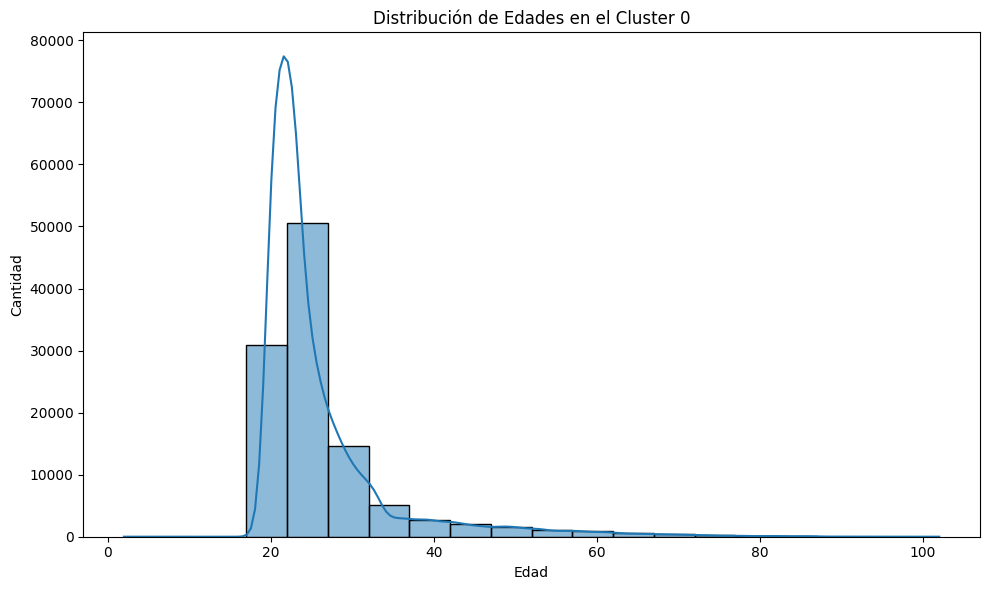

In [ ]:
# Rango de edades
plt.figure(figsize=(10, 6))
sns.histplot(data=cluster_0_data, x='age', bins=20, kde=True)
plt.title("Distribución de Edades en el Cluster 0")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

Salary

In [ ]:
# Encontrar el valor de salario más pronunciado (con mayor frecuencia)
most_common_salary = cluster_0_data['salary'].mode()

print("El salario más pronunciado en el Cluster 0 es.", most_common_salary)


El salario más pronunciado en el Cluster 0 es. 0    68069.04
Name: salary, dtype: float64


In [ ]:
# Definir los límites de los rangos salariales
salary_ranges = [0, 30000, 50000, 75000, float('inf')]

# Crear una nueva columna 'salary_range' que categorice los salarios en los rangos definidos
cluster_0_data['salary_range'] = pd.cut(cluster_0_data['salary'], bins=salary_ranges, labels=['0-30,000', '31,000-50,000', '51,000-75,000', '76,000 or more'])

# Contar cuántos clientes caen en cada rango salarial
salary_counts = cluster_0_data['salary_range'].value_counts()

# Imprimir los resultados
print("Distribución de salarios en el Cluster 0:")
for range_label, count in salary_counts.items():
    print(f"{range_label}: {count} clientes")


Distribución de salarios en el Cluster 0:
76,000 or more: 70033 clientes
51,000-75,000: 30145 clientes
31,000-50,000: 8858 clientes
0-30,000: 1767 clientes


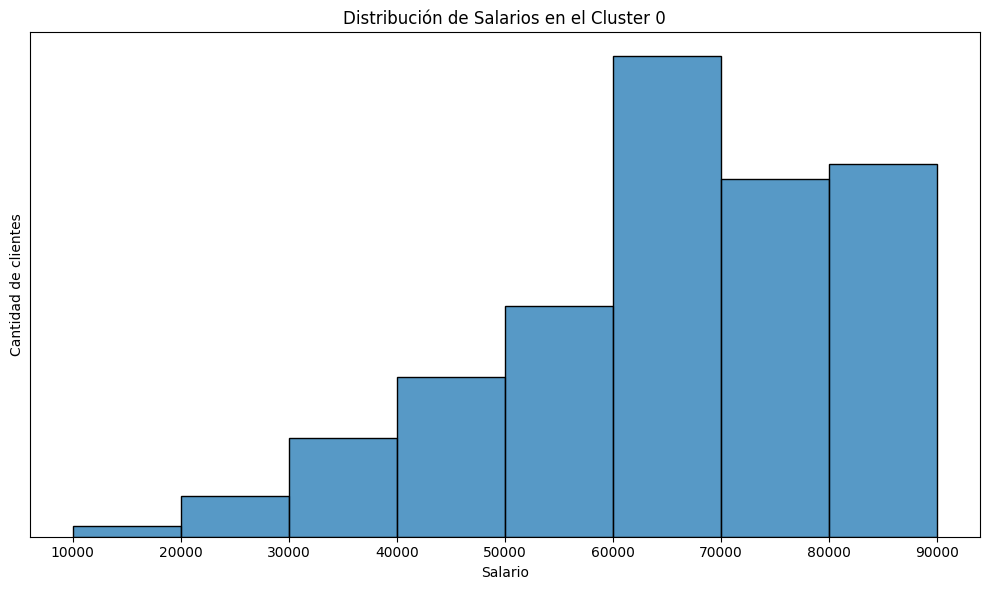

In [ ]:
import numpy as np

plt.figure(figsize=(10, 6))

# Definir los bordes de los intervalos personalizados
salary_bins = np.arange(10000, 100000, 10000)
sns.histplot(data=cluster_0_data, x='salary', bins=salary_bins, kde=False)  # kde=False para desactivar el KDE

plt.title("Distribución de Salarios en el Cluster 0")
plt.xlabel("Salario")
plt.ylabel("Cantidad de clientes")

plt.xticks(salary_bins)  # Establecer las marcas del eje X en los intervalos definidos
plt.yticks([])  # Quitar las marcas del eje Y

plt.tight_layout()
plt.show()


## Cluster 2

In [ ]:
cluster_1_data = cluster_dataframes[1]

In [ ]:
cluster_1_data.shape

(112406, 35)

In [ ]:
cluster_1_data.head(5)

,Unique_ID_client,duracion_meses,active_customer,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,Cuenta easyMoney++,...,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,gender_Male,deceased_S,zona_Asia,zona_Europe,zona_Middle East,zona_North America,zona_South America,cluster2
entry_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,622277,53,1.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2015-01-02,1000554,53,0.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2015-01-02,1000552,53,1.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2015-01-02,1000550,53,1.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2015-01-02,1000549,53,0.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1


Active_clients

In [ ]:
# Cuántos activos hay en el cluster
num_active_customers = (cluster_1_data['active_customer'] == 1).sum()
print(f"Número de clientes activos en el cluster: {num_active_customers}")
#  Cuántos no activos hay en el cluster
num_active_customers = (cluster_1_data['active_customer'] == 0).sum()
print(f"Número de clientes no activos en el cluster: {num_active_customers}")

Número de clientes activos en el cluster: 62459
Número de clientes no activos en el cluster: 49947


Productos Financieros

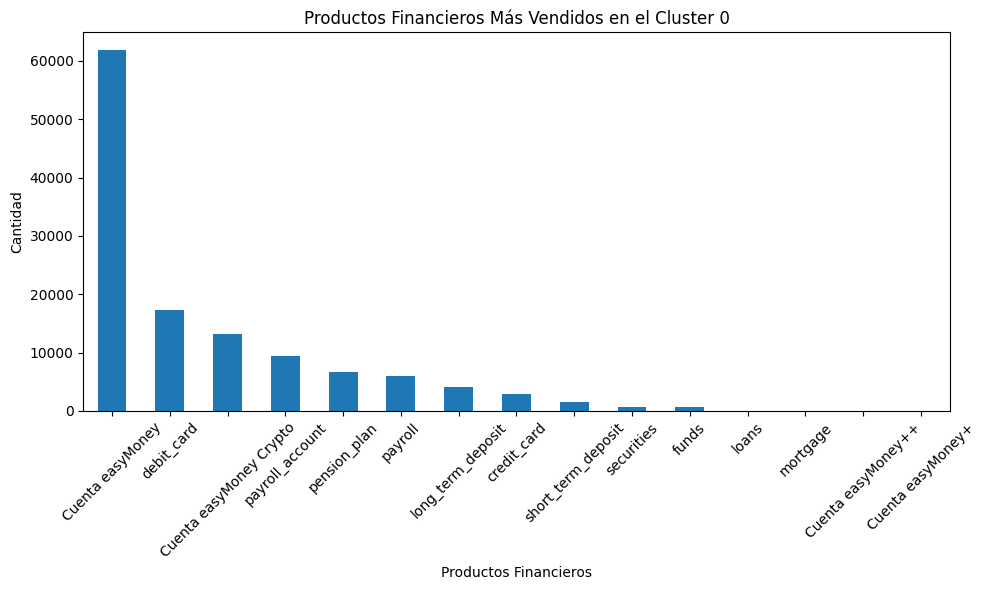

In [ ]:
#  Productos financieros más vendidos
product_columns3 = ['Cuenta easyMoney', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'Cuenta easyMoney++', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'Cuenta easyMoney Crypto', 'debit_card', 'Cuenta easyMoney+',]
product_sales = cluster_1_data[product_columns3].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.title("Productos Financieros Más Vendidos en el Cluster 0")
plt.xlabel("Productos Financieros")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

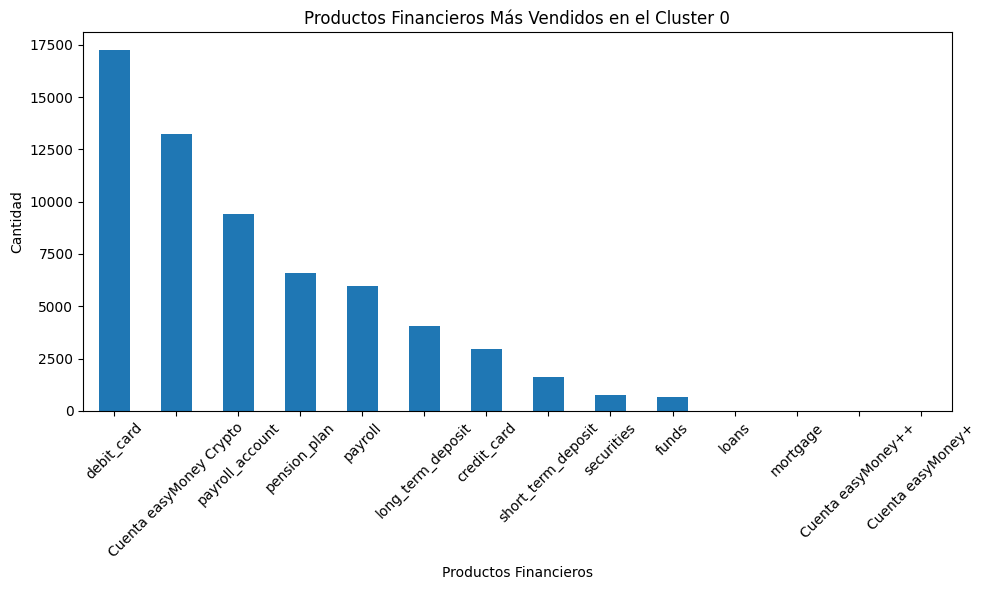

In [ ]:
#  Productos financieros más vendidos ( el mas vendido es la cuenta easy money la quite para poder visualizar las demas)
product_columns2 = ['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'Cuenta easyMoney++', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'Cuenta easyMoney Crypto', 'debit_card', 'Cuenta easyMoney+',]
product_sales = cluster_1_data[product_columns2].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.title("Productos Financieros Más Vendidos en el Cluster 0")
plt.xlabel("Productos Financieros")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from itertools import combinations

# Generar todas las combinaciones posibles de productos (excluyendo la Cuenta easyMoney++)
product_combinations2 = list(combinations(product_columns3[:-1], 2))

# Contar la frecuencia de cada combinación en el Cluster 0
combination_counts = {}
for combo in product_combinations2:
    combo_name = f"{combo[0]} + {combo[1]}"
    combination_counts[combo_name] = cluster_1_data[list(combo)].all(axis=1).sum()

# Crear un DataFrame para mostrar los resultados de manera tabular
result_df1 = pd.DataFrame(list(combination_counts.items()), columns=['Combinación de Productos', 'Frecuencia'])
result_df1 = result_df1[result_df1['Frecuencia'] > 0]  # Filtrar combinaciones con frecuencia mayor que cero
result_df1 = result_df1.sort_values(by='Frecuencia', ascending=False)

# Mostrar la tabla de resultados
print(result_df1)

                      Combinación de Productos  Frecuencia
12               Cuenta easyMoney + debit_card       11027
11  Cuenta easyMoney + Cuenta easyMoney Crypto        7000
85              pension_plan + payroll_account        6040
81                      payroll + pension_plan        5986
89                payroll_account + debit_card        5884
..                                         ...         ...
32                        loans + pension_plan           3
16             short_term_deposit + securities           2
34             loans + Cuenta easyMoney Crypto           2
2                  Cuenta easyMoney + mortgage           2
36                            mortgage + funds           1

[70 rows x 2 columns]


In [ ]:
'''csv_file_path = '/content/drive/MyDrive/TFM/Combinaciones_a _replicar.csv'

# Guardar el DataFrame en formato CSV
result_df1.to_csv(csv_file_path, index=False)'''

"csv_file_path = '/content/drive/MyDrive/TFM/Combinaciones_a _replicar.csv'\n\n# Guardar el DataFrame en formato CSV\nresult_df1.to_csv(csv_file_path, index=False)"

AGES

In [ ]:
# Encontrar el rango de edades más pronunciado (con mayor frecuencia)
most_common_age_range = cluster_1_data['age'].mode()

print('El rango de edades más pronunciado en el Cluster 1', most_common_age_range)


El rango de edades más pronunciado en el Cluster 1 0    34
Name: age, dtype: int64


In [ ]:
# Definir los límites de los rangos de edades
ages_ranges = [0, 30, 50, 75, float('inf')]

# Crear una nueva columna 'age_range' que categorice los salarios en los rangos definidos
cluster_1_data['ages_ranges'] = pd.cut(cluster_1_data['age'], bins=ages_ranges, labels=['0-30', '31-50', '51-75', '76 or more'])

# Contar cuántos clientes caen en cada rango de edad
age_counts = cluster_1_data['ages_ranges'].value_counts()

# Imprimir los resultados
print("Distribución de edades en el Cluster 1:")
for range_label, count in age_counts.items():
    print(f"{range_label}: {count} clientes")

Distribución de edades en el Cluster 1:
31-50: 70862 clientes
51-75: 21157 clientes
0-30: 17878 clientes
76 or more: 2509 clientes


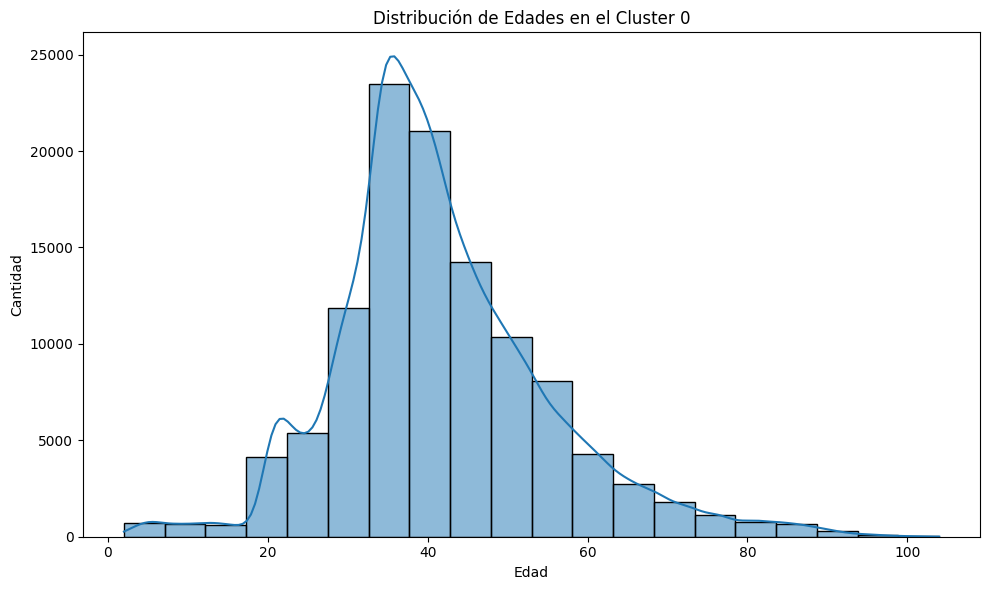

In [ ]:
# Rango de edades
plt.figure(figsize=(10, 6))
sns.histplot(data=cluster_1_data, x='age', bins=20, kde=True)
plt.title("Distribución de Edades en el Cluster 0")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

Salary

In [ ]:
# Encontrar el valor de salario más pronunciado (con mayor frecuencia)
most_common_salary = cluster_1_data['salary'].mode()

print("El salario más pronunciado en el Cluster 1 es.", most_common_salary)

El salario más pronunciado en el Cluster 1 es. 0    107692.8
Name: salary, dtype: float64


In [ ]:
# Definir los límites de los rangos salariales
salary_ranges = [0, 30000, 50000, 75000, float('inf')]

# Crear una nueva columna 'salary_range' que categorice los salarios en los rangos definidos
cluster_1_data['salary_range'] = pd.cut(cluster_1_data['salary'], bins=salary_ranges, labels=['0-30,000', '31,000-50,000', '51,000-75,000', '76,000 or more'])

# Contar cuántos clientes caen en cada rango salarial
salary_counts = cluster_1_data['salary_range'].value_counts()

# Imprimir los resultados
print("Distribución de salarios en el Cluster 1:")
for range_label, count in salary_counts.items():
    print(f"{range_label}: {count} clientes")

Distribución de salarios en el Cluster 1:
76,000 or more: 72561 clientes
51,000-75,000: 27201 clientes
31,000-50,000: 10627 clientes
0-30,000: 2017 clientes


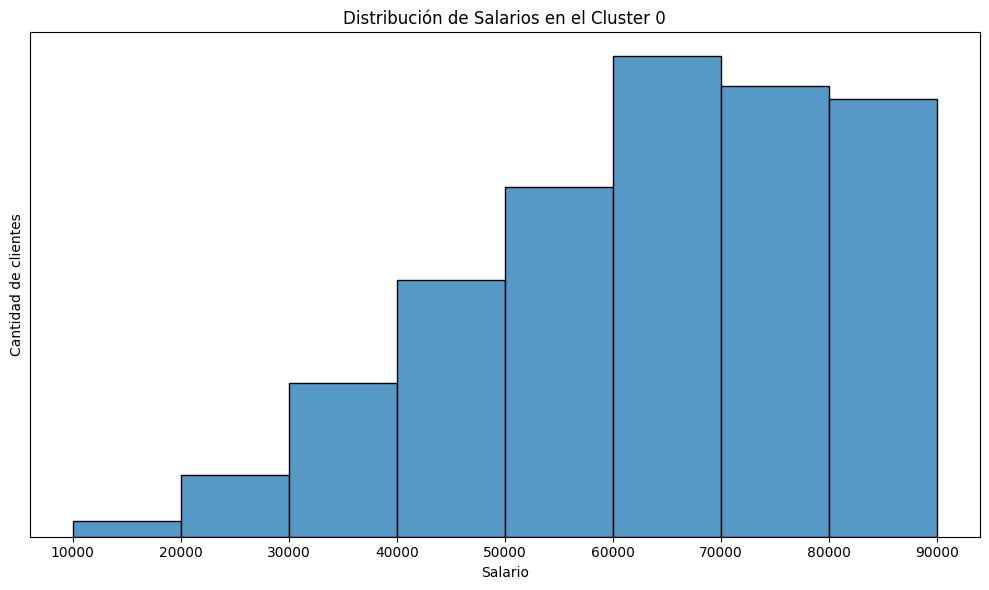

In [ ]:

plt.figure(figsize=(10, 6))

# Definir los bordes de los intervalos personalizados
salary_bins = np.arange(10000, 100000, 10000)
sns.histplot(data=cluster_1_data, x='salary', bins=salary_bins, kde=False)  # kde=False para desactivar el KDE

plt.title("Distribución de Salarios en el Cluster 0")
plt.xlabel("Salario")
plt.ylabel("Cantidad de clientes")

plt.xticks(salary_bins)  # Establecer las marcas del eje X en los intervalos definidos
plt.yticks([])  # Quitar las marcas del eje Y

plt.tight_layout()
plt.show()

# Tercer Cluster

In [ ]:
cluster_2_data = cluster_dataframes[2]

In [ ]:
cluster_2_data.shape

(99244, 35)

In [ ]:
cluster_2_data.head(5)

,Unique_ID_client,duracion_meses,active_customer,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,Cuenta easyMoney++,...,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,gender_Male,deceased_S,zona_Asia,zona_Europe,zona_Middle East,zona_North America,zona_South America,cluster2
entry_date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1000595,53,1.0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,2
2015-01-02,1000467,53,0.0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,2
2015-01-02,1000453,53,1.0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,2
2015-01-02,1000502,53,1.0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,2
2015-01-02,1000481,53,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,2


In [ ]:
# Cuántos activos hay en el cluster
num_active_customers = (cluster_2_data['active_customer'] == 1).sum()
print(f"Número de clientes activos en el cluster: {num_active_customers}")
#  Cuántos no activos hay en el cluster
num_active_customers = (cluster_2_data['active_customer'] == 0).sum()
print(f"Número de clientes no activos en el cluster: {num_active_customers}")

Número de clientes activos en el cluster: 19062
Número de clientes no activos en el cluster: 80182


Productos Financieros

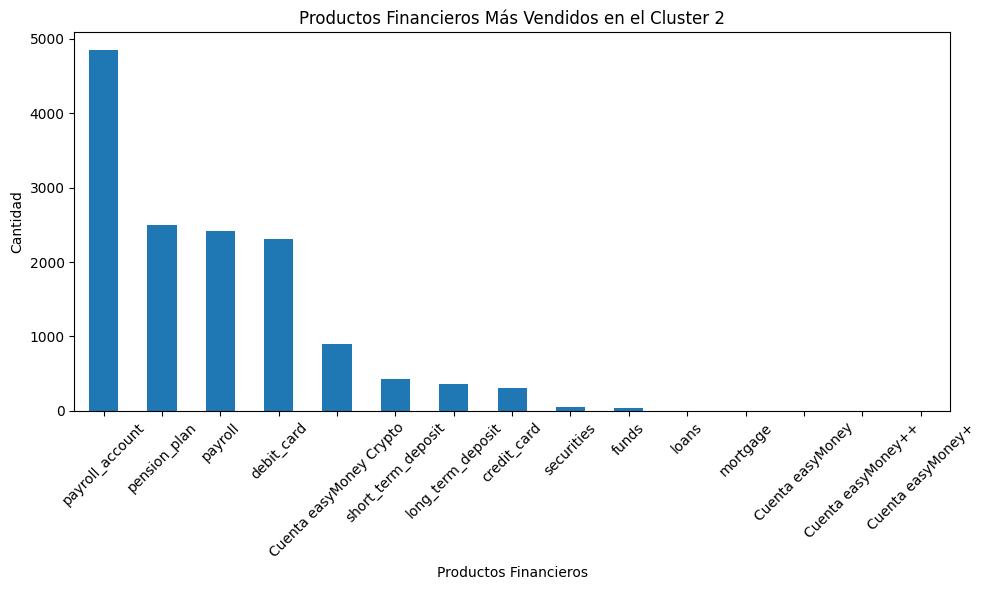

In [ ]:
#  Productos financieros más vendidos
product_columns4 = ['Cuenta easyMoney', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'Cuenta easyMoney++', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'Cuenta easyMoney Crypto', 'debit_card', 'Cuenta easyMoney+',]
product_sales = cluster_2_data[product_columns4].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.title("Productos Financieros Más Vendidos en el Cluster 2")
plt.xlabel("Productos Financieros")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from itertools import combinations

# Generar todas las combinaciones posibles de productos (excluyendo la Cuenta easyMoney++)
product_combinations5 = list(combinations(product_columns4[:-1], 2))

# Contar la frecuencia de cada combinación en el Cluster 0
combination_counts = {}
for combo in product_combinations5:
    combo_name = f"{combo[0]} + {combo[1]}"
    combination_counts[combo_name] = cluster_2_data[list(combo)].all(axis=1).sum()

# Crear un DataFrame para mostrar los resultados de manera tabular
result_df2 = pd.DataFrame(list(combination_counts.items()), columns=['Combinación de Productos', 'Frecuencia'])
result_df2 = result_df2[result_df2['Frecuencia'] > 0]  # Filtrar combinaciones con frecuencia mayor que cero
result_df2 = result_df2.sort_values(by='Frecuencia', ascending=False)

# Mostrar la tabla de resultados
print(result_df2)

                        Combinación de Productos  Frecuencia
85                pension_plan + payroll_account        2460
81                        payroll + pension_plan        2410
82                     payroll + payroll_account        2377
89                  payroll_account + debit_card        1970
87                     pension_plan + debit_card        1273
84                          payroll + debit_card        1242
88     payroll_account + Cuenta easyMoney Crypto         609
90          Cuenta easyMoney Crypto + debit_card         436
86        pension_plan + Cuenta easyMoney Crypto         403
83             payroll + Cuenta easyMoney Crypto         395
78                 credit_card + payroll_account         272
80                      credit_card + debit_card         220
77                    credit_card + pension_plan         215
76                         credit_card + payroll         210
79         credit_card + Cuenta easyMoney Crypto         140
68   long_term_deposit +

In [ ]:
csv_file_path = '/content/drive/MyDrive/TFM/ClusterReplicar.csv'

# Guardar el DataFrame en formato CSV
cluster_2_data.to_csv(csv_file_path, index=False)

In [ ]:
csv_file_path = '/content/drive/MyDrive/TFM/Mejores_Combinaciones.csv'

# Guardar el DataFrame en formato CSV
result_df2.to_csv(csv_file_path, index=False)

AGES

In [ ]:
# Encontrar el rango de edades más pronunciado (con mayor frecuencia)
most_common_age_range = cluster_2_data['age'].mode()

print('El rango de edades más pronunciado en el Cluster 2', most_common_age_range)


El rango de edades más pronunciado en el Cluster 2 0    21
Name: age, dtype: int64


In [ ]:
# Definir los límites de los rangos de edades
ages_ranges = [0, 30, 50, 75, float('inf')]

# Crear una nueva columna 'age_range' que categorice los salarios en los rangos definidos
cluster_2_data['ages_ranges'] = pd.cut(cluster_2_data['age'], bins=ages_ranges, labels=['0-30', '31-50', '51-75', '76 or more'])

# Contar cuántos clientes caen en cada rango de edad
age_counts = cluster_2_data['ages_ranges'].value_counts()

# Imprimir los resultados
print("Distribución de edades en el Cluster 2:")
for range_label, count in age_counts.items():
    print(f"{range_label}: {count} clientes")

Distribución de edades en el Cluster 2:
0-30: 74898 clientes
31-50: 18741 clientes
51-75: 5002 clientes
76 or more: 603 clientes


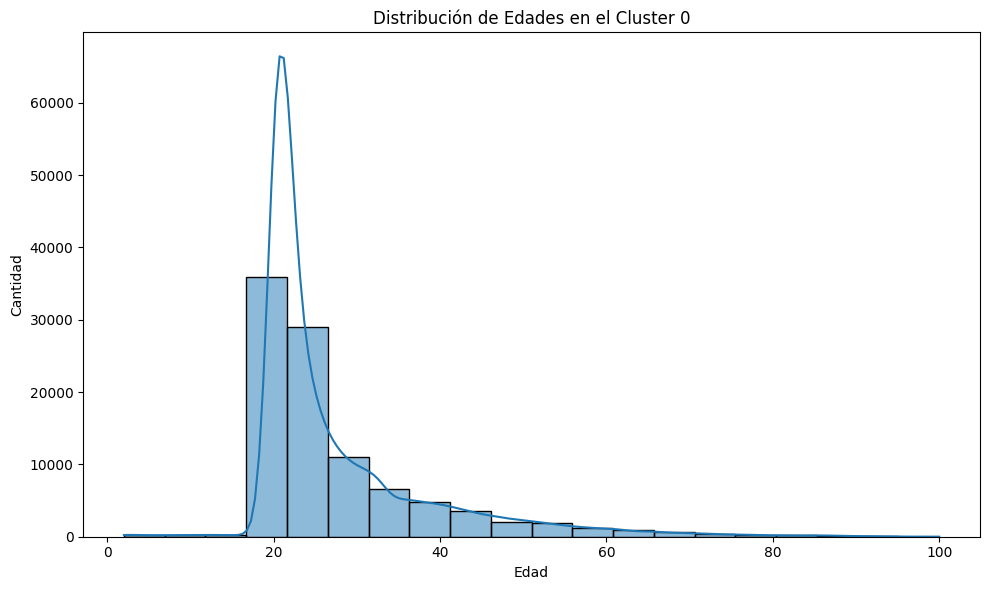

In [ ]:
# Rango de edades
plt.figure(figsize=(10, 6))
sns.histplot(data=cluster_2_data, x='age', bins=20, kde=True)
plt.title("Distribución de Edades en el Cluster 0")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

Salary

In [ ]:
# Encontrar el valor de salario más pronunciado (con mayor frecuencia)
most_common_salary = cluster_2_data['salary'].mode()

print("El salario más pronunciado en el Cluster 2 es.", most_common_salary)

El salario más pronunciado en el Cluster 2 es. 0    137457.75
Name: salary, dtype: float64


In [ ]:
# Definir los límites de los rangos salariales
salary_ranges = [0, 30000, 50000, 75000, float('inf')]

# Crear una nueva columna 'salary_range' que categorice los salarios en los rangos definidos
cluster_2_data['salary_range'] = pd.cut(cluster_2_data['salary'], bins=salary_ranges, labels=['0-30,000', '31,000-50,000', '51,000-75,000', '76,000 or more'])

# Contar cuántos clientes caen en cada rango salarial
salary_counts = cluster_2_data['salary_range'].value_counts()

# Imprimir los resultados
print("Distribución de salarios en el Cluster 2:")
for range_label, count in salary_counts.items():
    print(f"{range_label}: {count} clientes")

Distribución de salarios en el Cluster 2:
76,000 or more: 72313 clientes
51,000-75,000: 21889 clientes
31,000-50,000: 4290 clientes
0-30,000: 752 clientes


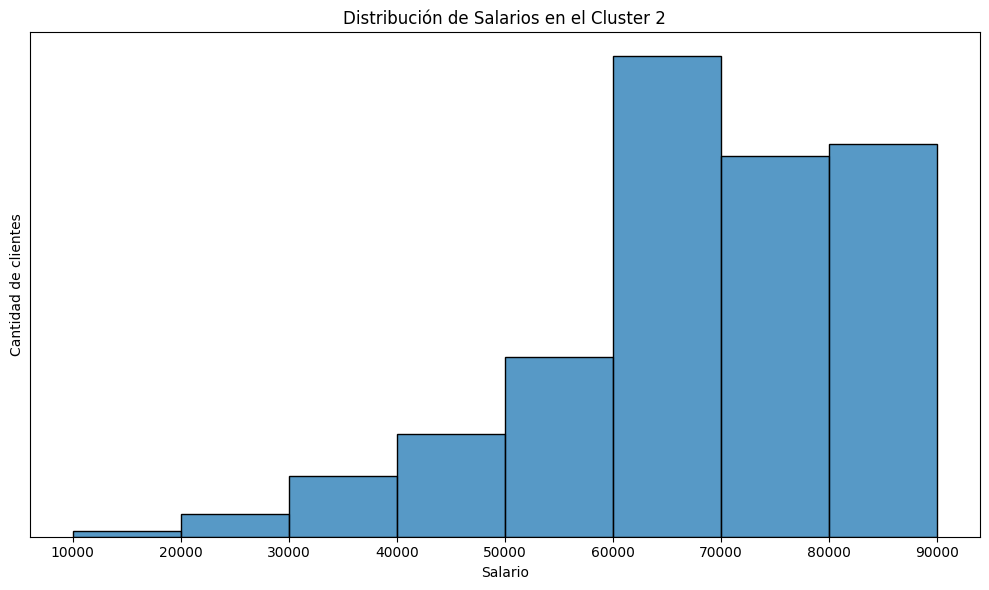

In [ ]:

plt.figure(figsize=(10, 6))

# Definir los bordes de los intervalos personalizados
salary_bins = np.arange(10000, 100000, 10000)
sns.histplot(data=cluster_2_data, x='salary', bins=salary_bins, kde=False)  # kde=False para desactivar el KDE

plt.title("Distribución de Salarios en el Cluster 2")
plt.xlabel("Salario")
plt.ylabel("Cantidad de clientes")

plt.xticks(salary_bins)  # Establecer las marcas del eje X en los intervalos definidos
plt.yticks([])  # Quitar las marcas del eje Y

plt.tight_layout()
plt.show()

# Cuarto Cluster

In [ ]:
cluster_3_data = cluster_dataframes[3]

In [ ]:
cluster_3_data.shape

(133916, 35)

In [ ]:
cluster_3_data.head(5)

,Unique_ID_client,duracion_meses,active_customer,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,Cuenta easyMoney++,...,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,gender_Male,deceased_S,zona_Asia,zona_Europe,zona_Middle East,zona_North America,zona_South America,cluster2
entry_date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1000394,53,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,3
2015-01-02,1000548,53,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,3
2015-01-02,1000591,53,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,3
2015-01-02,1000580,53,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,3
2015-01-02,1000578,53,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,3


In [ ]:
# Cuántos activos hay en el cluster
num_active_customers = (cluster_3_data['active_customer'] == 1).sum()
print(f"Número de clientes activos en el cluster: {num_active_customers}")
#  Cuántos no activos hay en el cluster
num_active_customers = (cluster_3_data['active_customer'] == 0).sum()
print(f"Número de clientes no activos en el cluster: {num_active_customers}")

Número de clientes activos en el cluster: 46823
Número de clientes no activos en el cluster: 87093


Productos Financieros

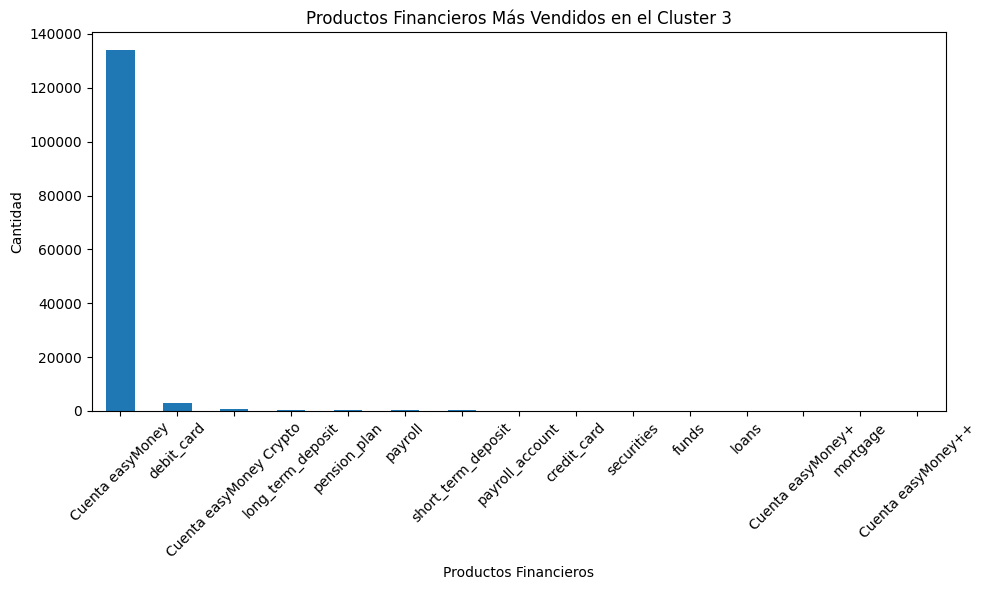

In [ ]:
#  Productos financieros más vendidos
product_columns6 = ['Cuenta easyMoney', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'Cuenta easyMoney++', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'Cuenta easyMoney Crypto', 'debit_card', 'Cuenta easyMoney+',]
product_sales = cluster_3_data[product_columns6].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.title("Productos Financieros Más Vendidos en el Cluster 3")
plt.xlabel("Productos Financieros")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from itertools import combinations

# Generar todas las combinaciones posibles de productos (excluyendo la Cuenta easyMoney++)
product_combinations7 = list(combinations(product_columns6[:-1], 2))

# Contar la frecuencia de cada combinación en el Cluster 3
combination_counts = {}
for combo in product_combinations7:
    combo_name = f"{combo[0]} + {combo[1]}"
    combination_counts[combo_name] = cluster_3_data[list(combo)].all(axis=1).sum()

# Crear un DataFrame para mostrar los resultados de manera tabular
result_df3 = pd.DataFrame(list(combination_counts.items()), columns=['Combinación de Productos', 'Frecuencia'])
result_df3 = result_df3[result_df3['Frecuencia'] > 0]  # Filtrar combinaciones con frecuencia mayor que cero
result_df3 = result_df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar la tabla de resultados
print(result_df3)

                        Combinación de Productos  Frecuencia
12                 Cuenta easyMoney + debit_card        3062
11    Cuenta easyMoney + Cuenta easyMoney Crypto         637
5           Cuenta easyMoney + long_term_deposit         484
9                Cuenta easyMoney + pension_plan         317
81                        payroll + pension_plan         313
8                     Cuenta easyMoney + payroll         313
0          Cuenta easyMoney + short_term_deposit         306
90          Cuenta easyMoney Crypto + debit_card         167
10            Cuenta easyMoney + payroll_account          82
87                     pension_plan + debit_card          78
84                          payroll + debit_card          77
7                 Cuenta easyMoney + credit_card          74
89                  payroll_account + debit_card          62
85                pension_plan + payroll_account          55
82                     payroll + payroll_account          55
4                  Cuent

AGES

In [ ]:
# Encontrar el rango de edades más pronunciado (con mayor frecuencia)
most_common_age_range = cluster_3_data['age'].mode()

print('El rango de edades más pronunciado en el Cluster 3', most_common_age_range)


El rango de edades más pronunciado en el Cluster 3 0    22
Name: age, dtype: int64


In [ ]:
# Definir los límites de los rangos de edades
ages_ranges = [0, 30, 50, 75, float('inf')]

# Crear una nueva columna 'age_range' que categorice los salarios en los rangos definidos
cluster_3_data['ages_ranges'] = pd.cut(cluster_3_data['age'], bins=ages_ranges, labels=['0-30', '31-50', '51-75', '76 or more'])

# Contar cuántos clientes caen en cada rango de edad
age_counts = cluster_3_data['ages_ranges'].value_counts()

# Imprimir los resultados
print("Distribución de edades en el Cluster 0:")
for range_label, count in age_counts.items():
    print(f"{range_label}: {count} clientes")

Distribución de edades en el Cluster 0:
0-30: 120321 clientes
31-50: 10692 clientes
51-75: 2504 clientes
76 or more: 399 clientes


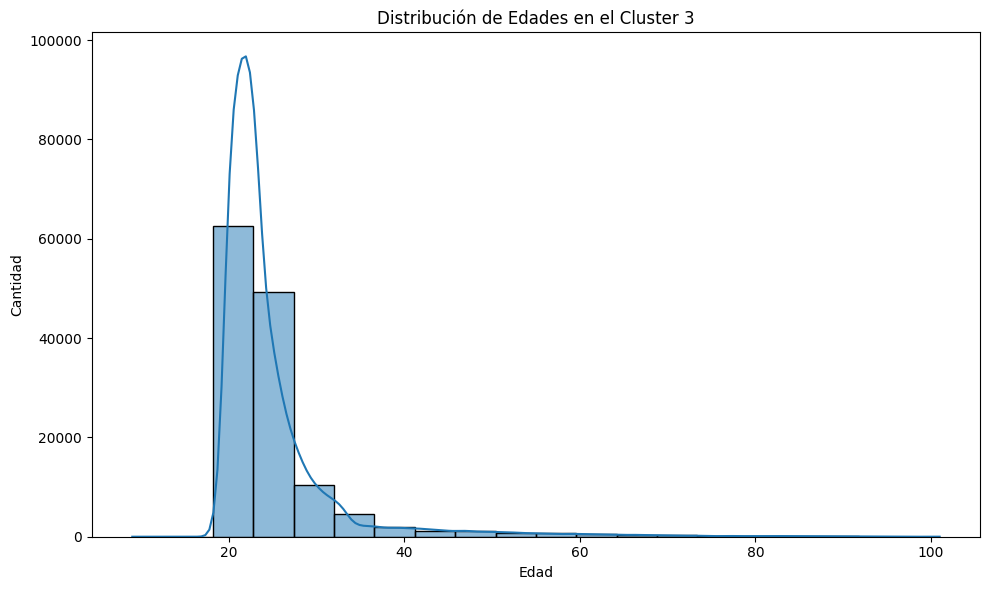

In [ ]:
# Rango de edades
plt.figure(figsize=(10, 6))
sns.histplot(data=cluster_3_data, x='age', bins=20, kde=True)
plt.title("Distribución de Edades en el Cluster 3")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

Salary

In [ ]:
# Encontrar el valor de salario más pronunciado (con mayor frecuencia)
most_common_salary = cluster_3_data['salary'].mode()

print("El salario más pronunciado en el Cluster 3 es.", most_common_salary)

El salario más pronunciado en el Cluster 3 es. 0    137457.75
Name: salary, dtype: float64


In [ ]:
# Definir los límites de los rangos salariales
salary_ranges = [0, 30000, 50000, 75000, float('inf')]

# Crear una nueva columna 'salary_range' que categorice los salarios en los rangos definidos
cluster_3_data['salary_range'] = pd.cut(cluster_3_data['salary'], bins=salary_ranges, labels=['0-30,000', '31,000-50,000', '51,000-75,000', '76,000 or more'])

# Contar cuántos clientes caen en cada rango salarial
salary_counts = cluster_3_data['salary_range'].value_counts()

# Imprimir los resultados
print("Distribución de salarios en el Cluster 3:")
for range_label, count in salary_counts.items():
    print(f"{range_label}: {count} clientes")

Distribución de salarios en el Cluster 3:
76,000 or more: 81070 clientes
51,000-75,000: 38031 clientes
31,000-50,000: 12229 clientes
0-30,000: 2586 clientes


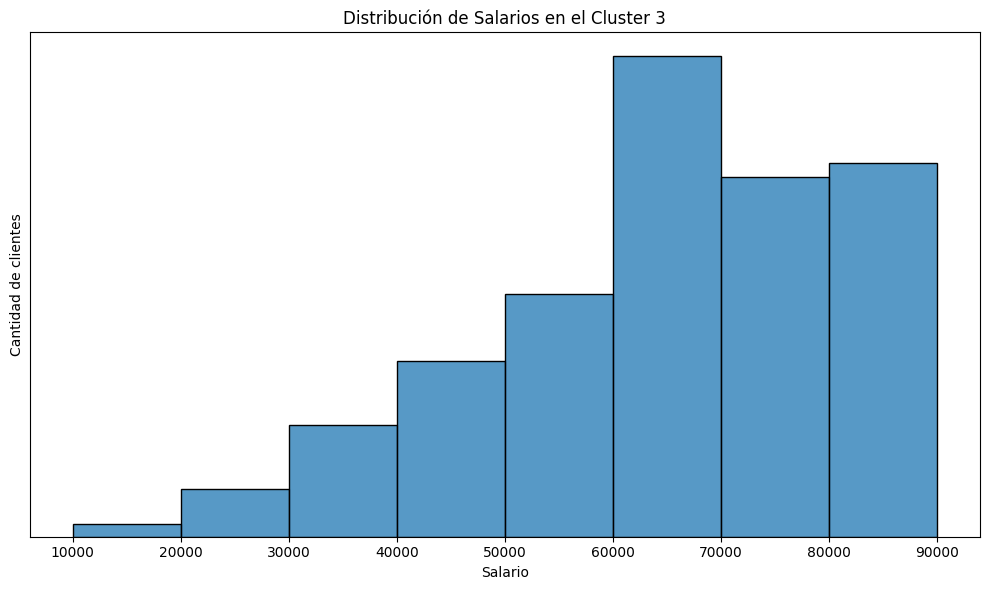

In [ ]:

plt.figure(figsize=(10, 6))

# Definir los bordes de los intervalos personalizados
salary_bins = np.arange(10000, 100000, 10000)
sns.histplot(data=cluster_3_data, x='salary', bins=salary_bins, kde=False)  # kde=False para desactivar el KDE

plt.title("Distribución de Salarios en el Cluster 3")
plt.xlabel("Salario")
plt.ylabel("Cantidad de clientes")

plt.xticks(salary_bins)  # Establecer las marcas del eje X en los intervalos definidos
plt.yticks([])  # Quitar las marcas del eje Y

plt.tight_layout()
plt.show()